# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

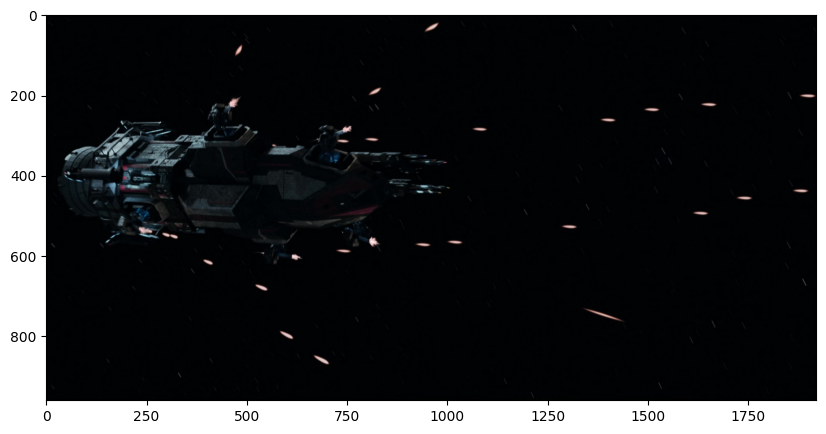

In [14]:
img = cv2.imread('./expanse.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

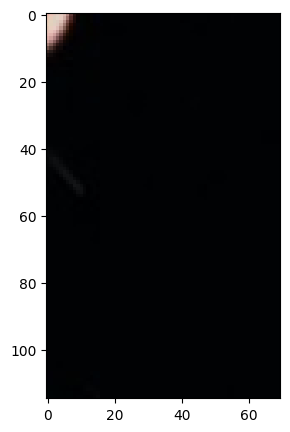

In [15]:
# Visualize the area in original image that should contain white pixels
white_area = img[85:200, 480:550, :]
plt.imshow(white_area)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d73925cc560>)

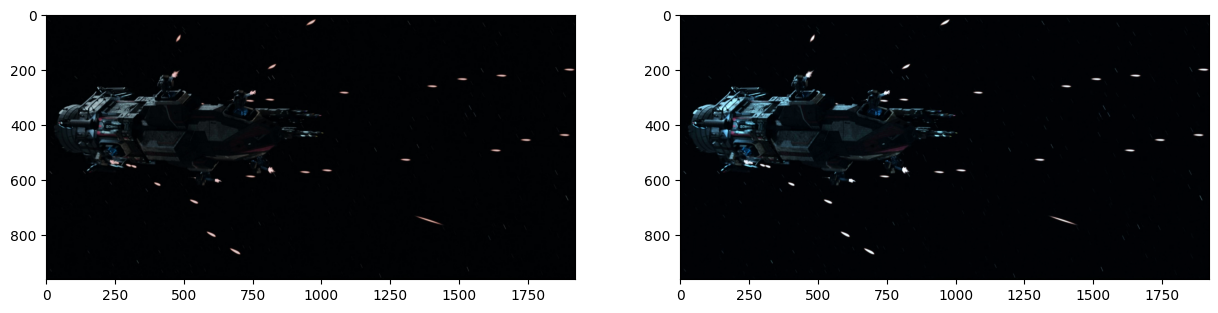

In [16]:
# Define white patch and the coefficients
row, col = 85, 480
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x7d7391b83170>)

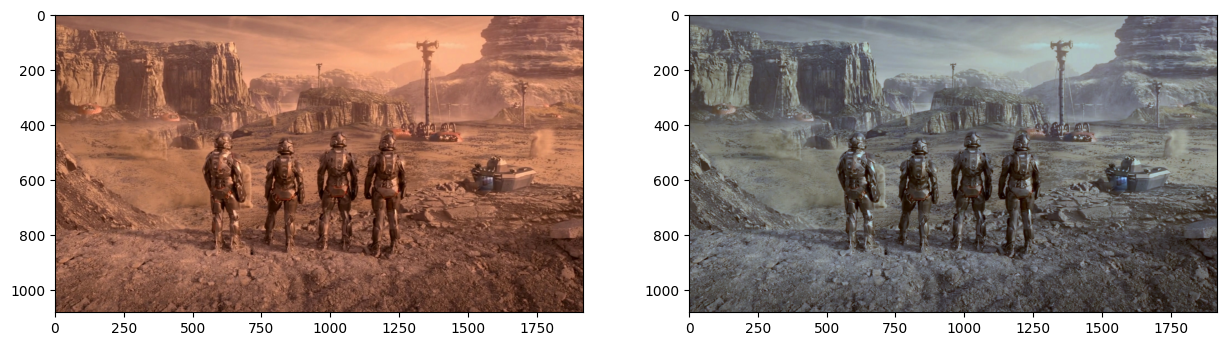

In [17]:
# Load your image
img = cv2.imread('expanse_mars.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# split image by channels
img_r = img[..., 0] / 255
img_g = img[..., 1] / 255
img_b = img[..., 2] / 255

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img_r)
mean_g = np.mean(img_g)
mean_b = np.mean(img_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 0.7
kg = mean_r * kr / mean_g
kb = mean_r * kr / mean_b

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img_r * kr
balanced[..., 1] = img_g * kg
balanced[..., 2] = img_b * kb
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x7d7391a35700>)

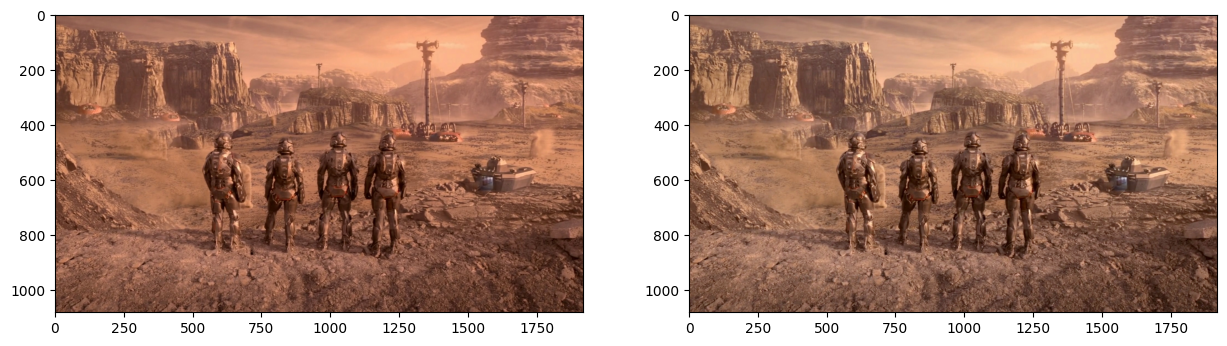

In [18]:
# Load your image
img = cv2.imread('expanse_mars.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# split image by channels
img_r = img[..., 0] / 255
img_g = img[..., 1] / 255
img_b = img[..., 2] / 255

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img_r)
max_g = np.max(img_g)
max_b = np.max(img_b)

# compute coefficients that should be applied to channels
coef_r = 1 / max_r
coef_g = 1 / max_g
coef_b = 1 / max_b

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img_r * coef_r
balanced[..., 1] = img_g * coef_g
balanced[..., 2] = img_b * coef_b

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)